In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import numpy as np
from pylamp.loss.losses import BCELoss,MSELoss
from matplotlib import pyplot as plt
from pylamp.neural.sequential import Sequential
from pylamp.neural.layers import Linear
from pylamp.optim.optimizer import Optim
from pylamp.neural.activations import TanH, Sigmoid
from pylamp.optim.optimizer import SGD
from pylamp.utils.usps import load_usps, show_usps
from pylamp.utils.plotter import Display

In [3]:
def plot_loss(losses):
    epochs = range(1, len(losses) + 1)
    plt.plot(epochs, losses, label='Training Loss')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

## Loading Data

In [4]:
uspsdatatrain = "./data/USPS/USPS_train.txt"
uspsdatatest = "./data/USPS/USPS_test.txt"
X_train, y_train = load_usps(uspsdatatrain)
X_test, y_test = load_usps(uspsdatatest)

## Autoencoder on USPS data

• Encodage : Linear(256,100) → TanH() → Linear(100,10) → TanH()

• Décodage : Linear(10,100) → TanH() → Linear(100,256) → Sigmoide()

### One big Sequential

In [5]:
autoencoder = Sequential()
autoencoder.add_module(Linear(256,100))
autoencoder.add_module(TanH())
autoencoder.add_module(Linear(100,10))
autoencoder.add_module(TanH())
autoencoder.add_module(Linear(10,100))
autoencoder.add_module(TanH())
autoencoder.add_module(Linear(100,256))
autoencoder.add_module(Sigmoid())


loss = BCELoss()
optimizer_autoencoder = Optim(autoencoder,loss,1e-3)
autoencoder_losses = SGD(optimizer_autoencoder,X_train, X_train, batch_size=256,epochs=300,verbose=True)

Epoch 1/300, Average Loss: 3.3097863927316853
Epoch 31/300, Average Loss: 0.12619720087902703
Epoch 61/300, Average Loss: -0.11958039797590488
Epoch 91/300, Average Loss: -0.2822743076558864
Epoch 121/300, Average Loss: -0.4037766102513674
Epoch 151/300, Average Loss: -0.48368474173419646
Epoch 181/300, Average Loss: -0.5426012637609938
Epoch 211/300, Average Loss: -0.5933937486351754
Epoch 241/300, Average Loss: -0.6295879133852883
Epoch 271/300, Average Loss: -0.6505841431017408
Training finished.


Original VS AutoEncoder output:


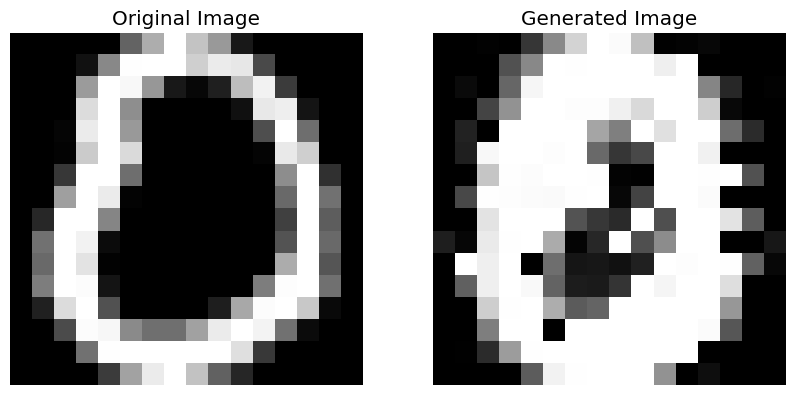

In [53]:
testing = np.array([X_test[40]])
testing_pred = autoencoder.forward(testing)
print("Original VS AutoEncoder output:")
Display.compare_images(testing,testing_pred,shape=(16,16),fig_size=(10,5))

### Seperating encoder and decoder into two sequentials and MSELoss

In [13]:
autoencoder = Sequential()

encoder = Sequential()
encoder.add_module(Linear(256,100))
encoder.add_module(TanH())
encoder.add_module(Linear(100,10))
encoder.add_module(TanH())

decoder = Sequential()
decoder.add_module(Linear(10,100))
decoder.add_module(TanH())
decoder.add_module(Linear(100,256))
decoder.add_module(Sigmoid())

autoencoder.add_module(encoder)
autoencoder.add_module(decoder)

loss = MSELoss()
optimizer_autoencoder = Optim(autoencoder,loss,1e-3)
autoencoder_losses = SGD(optimizer_autoencoder,X_train, X_train, batch_size=256,epochs=1000,verbose=True)

Epoch 1/1000, Average Loss: 0.7851027756363637
Epoch 101/1000, Average Loss: 0.564348372619129
Epoch 201/1000, Average Loss: 0.5218847204522085
Epoch 301/1000, Average Loss: 0.49626708649495205
Epoch 401/1000, Average Loss: 0.4797040252944056
Epoch 501/1000, Average Loss: 0.46984970855629643
Epoch 601/1000, Average Loss: 0.4625028455547086
Epoch 701/1000, Average Loss: 0.45562145551227473
Epoch 801/1000, Average Loss: 0.4506880490503708
Epoch 901/1000, Average Loss: 0.44530385388672433
Training finished.


encoded=array([[ 0.99999735, -1.        ,  1.        ,  1.        , -1.        ,
        -1.        , -1.        , -1.        ,  1.        ,  0.9999998 ]])
Original VS AutoEncoder output:


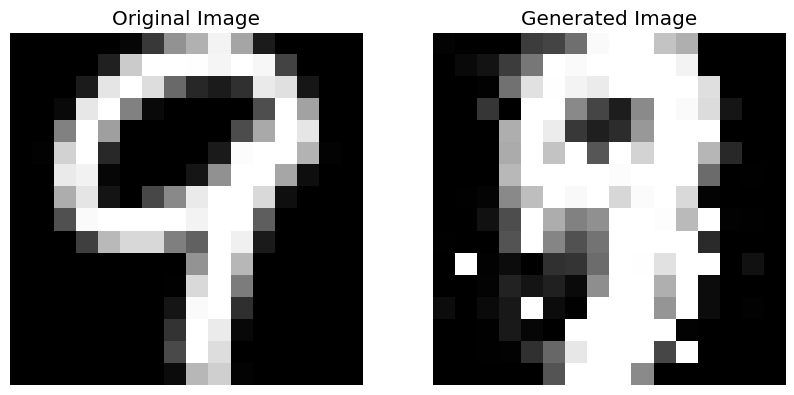

In [54]:
testing = np.array([X_test[0]])
encoded = encoder.forward(testing)
print(f"{encoded=}")
decoded = decoder.forward(encoded)
print("Original VS AutoEncoder output:")
Display.compare_images(testing,decoded,shape=(16,16),fig_size=(10,5))